In [1]:
import xarray as xr

In [2]:
data_dir = '/data/cl61/daily'

In [3]:
import os
files_cl61 = sorted([os.path.join(data_dir,f) for f in os.listdir(data_dir)])
files_cl61

['/data/cl61/daily/summary_cl61_20240228.nc',
 '/data/cl61/daily/summary_cl61_20240229.nc',
 '/data/cl61/daily/summary_cl61_20240301.nc',
 '/data/cl61/daily/summary_cl61_20240302.nc',
 '/data/cl61/daily/summary_cl61_20240303.nc',
 '/data/cl61/daily/summary_cl61_20240304.nc',
 '/data/cl61/daily/summary_cl61_20240305.nc']

In [4]:
ds_list = [xr.open_dataset(f) for f in files_cl61]

for ds in ds_list:
    print('='*50)
    print(ds)

<xarray.Dataset> Size: 5kB
Dimensions:                      (time: 23, layer: 5)
Coordinates:
  * layer                        (layer) float64 40B 1.0 2.0 3.0 4.0 5.0
    longitude                    float64 8B ...
    latitude                     float64 8B ...
  * time                         (time) datetime64[ns] 184B 2024-02-28T00:30:...
Data variables:
    cloud_base_heights_mean      (time, layer) float64 920B ...
    cloud_thickness_mean         (time, layer) float64 920B ...
    tilt_angle_mean              (time) float32 92B ...
    beta_att_sum_median          (time) float64 184B ...
    beta_att_sum_std             (time) float64 184B ...
    cloud_base_heights_std       (time, layer) float64 920B ...
    cloud_thickness_std          (time, layer) float64 920B ...
    tilt_angle_std               (time) float32 92B ...
    precipitation_detection_sum  (time) float32 92B ...
    fog_detection_sum            (time) float32 92B ...
    time_count                   (time) int64 

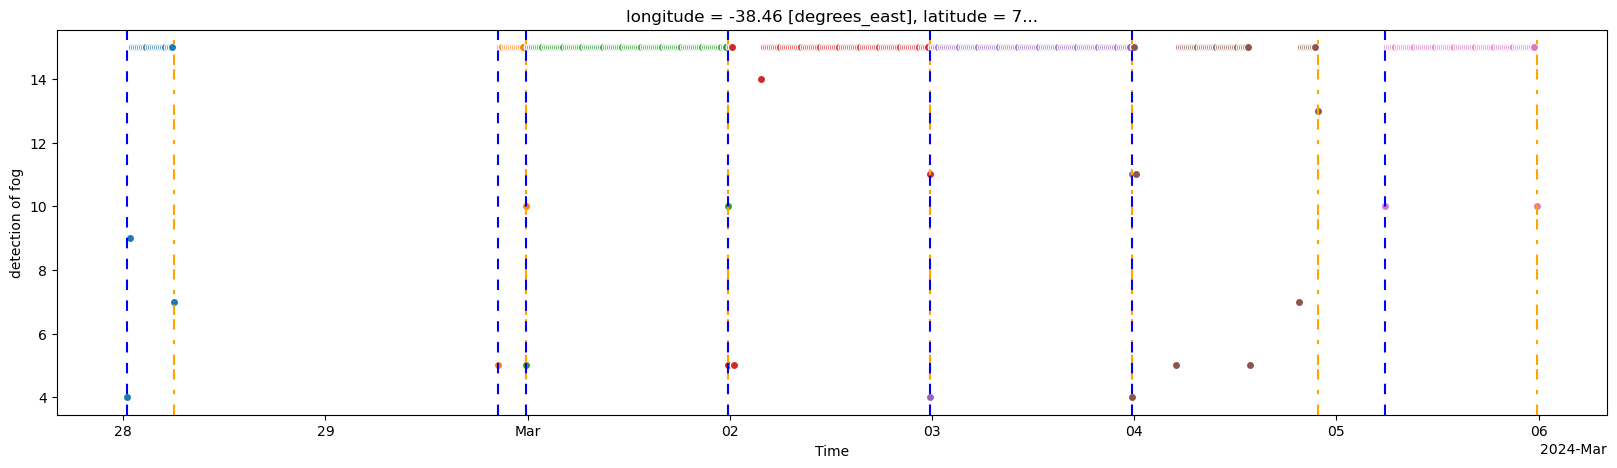

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(20,5))

for ds in ds_list:
    ds.time_count.plot.scatter(x='time', ax=ax)
    ax.axvline(ds.time.isel(time=0).values, c='blue', dashes=(5,5))
    ax.axvline(ds.time.isel(time=-1).values, c='orange', dashes=(5,5,2))


plt.show()
plt.clf()